<a href="https://colab.research.google.com/github/ShekharGaikwadDS/mlproject/blob/main/Trading_System_Engineer_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving data_2019.csv to data_2019.csv


In [3]:
import pandas as pd
df = pd.read_csv("data_2019.csv", header=None)
header = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volumn']
df.columns = header


In [4]:
df.head()

,Date,Time,Open,High,Low,Close,Volumn
0,2019.01.02,00:00:00,1.14598,1.14672,1.14598,1.14606,1259
1,2019.01.02,01:00:00,1.14605,1.14676,1.14566,1.14612,3783
2,2019.01.02,02:00:00,1.14612,1.14626,1.14543,1.14561,2325
3,2019.01.02,03:00:00,1.14561,1.14563,1.14457,1.14521,3520
4,2019.01.02,04:00:00,1.14521,1.14533,1.14426,1.14456,3959


In [5]:
data_types = df.dtypes
print(data_types)

Date       object
Time       object
Open      float64
High      float64
Low       float64
Close     float64
Volumn      int64
dtype: object


In [6]:
clean_data_types = data_types.apply(lambda x: f"**{x}**")
print("\nClean Data Types:")
print(clean_data_types)


Clean Data Types:
Date       **object**
Time       **object**
Open      **float64**
High      **float64**
Low       **float64**
Close     **float64**
Volumn      **int64**
dtype: object


In [7]:
df.isnull().sum()


Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volumn    0
dtype: int64

checking if the "Open" value is not higher than the "High" value or lower than the "Low" value

In [8]:
inconsistent_values = df[(df['Open'] > df['High']) | (df['Open'] < df['Low'])]


In [9]:
inconsistent_values

,Date,Time,Open,High,Low,Close,Volumn


Checking if there's any outlier in data

In [10]:
import numpy as np
z_scores = np.abs((df['Close'] - df['Close'].mean()) / df['Close'].std())
threshold = 3
outliers = df[z_scores > threshold]
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Date, Time, Open, High, Low, Close, Volumn]
Index: []


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [12]:
df

,Date,Time,Open,High,Low,Close,Volumn
0,2019-01-02,00:00:00,1.14598,1.14672,1.14598,1.14606,1259
1,2019-01-02,01:00:00,1.14605,1.14676,1.14566,1.14612,3783
2,2019-01-02,02:00:00,1.14612,1.14626,1.14543,1.14561,2325
3,2019-01-02,03:00:00,1.14561,1.14563,1.14457,1.14521,3520
4,2019-01-02,04:00:00,1.14521,1.14533,1.14426,1.14456,3959
...,...,...,...,...,...,...,...
6219,2019-12-31,19:00:00,1.12263,1.12294,1.12228,1.12291,3125
6220,2019-12-31,20:00:00,1.12289,1.12289,1.12226,1.12232,1666
6221,2019-12-31,21:00:00,1.12231,1.12237,1.12168,1.12170,1678
6222,2019-12-31,22:00:00,1.12170,1.12184,1.12147,1.12174,1505


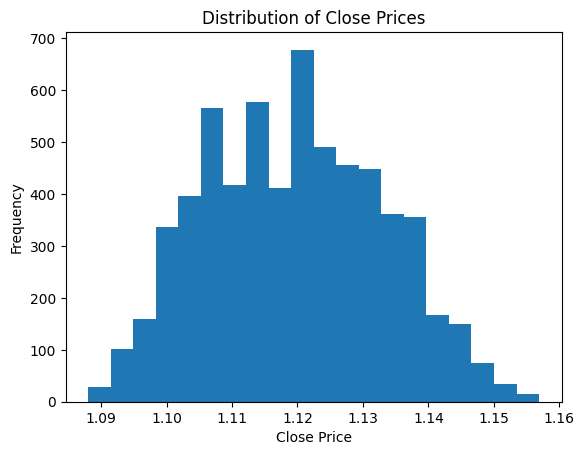

In [14]:

import matplotlib.pyplot as plt
header = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df.columns = header

df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df.dropna(inplace=True)

summary_stats = df['Close'].describe()

plt.hist(df['Close'], bins=20)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Prices')
plt.show()

In [15]:
df.set_index('Date', inplace=True)

def calculate_crossovers(df, lookback):
    df['Moving_Close'] = df['Close'].rolling(window=lookback).mean()
    df['Previous_Week_Mean'] = df.groupby(pd.Grouper(freq='W'))['Moving_Close'].shift()
    df['Crossover_Above'] = (df['Close'] > df['Previous_Week_Mean']).astype(int)
    df['Crossover_Below'] = (df['Close'] < df['Previous_Week_Mean']).astype(int)
    crossover_counts = df.groupby(pd.Grouper(freq='W'))['Crossover_Above', 'Crossover_Below'].sum()
    return crossover_counts

crossover_counts = calculate_crossovers(df, lookback=25)
print(crossover_counts)


            Crossover_Above  Crossover_Below
Date                                        
2019-01-06               33               14
2019-01-13               75               44
2019-01-20               32               87
2019-01-27               48               71
2019-02-03               81               38
2019-02-10                3              116
2019-02-17               45               74
2019-02-24               68               51
2019-03-03               74               45
2019-03-10               32               88
2019-03-17               98               21
2019-03-24               66               53
2019-03-31               30               88
2019-04-07               59               60
2019-04-14               87               32
2019-04-21               49               70
2019-04-28               36               83
2019-05-05               73               46
2019-05-12               83               36
2019-05-19               35               84
2019-05-26

<ipython-input-15-61288176c904>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crossover_counts = df.groupby(pd.Grouper(freq='W'))['Crossover_Above', 'Crossover_Below'].sum()


In [16]:
df_daily = df.resample('D').last()


In [17]:
df_daily['Close_Percentage_Change'] = df_daily['Close'].pct_change() * 100


In [18]:
top_positive_days = df_daily.nlargest(5, 'Close_Percentage_Change')


In [19]:
top_negative_days = df_daily.nsmallest(5, 'Close_Percentage_Change')


In [20]:
print("\nTop 5 Days with Highest Positive Percentage Change:")
print(top_positive_days)

print("\nTop 5 Days with Highest Negative Percentage Change:")
print(top_negative_days)


Top 5 Days with Highest Positive Percentage Change:
                Time     Open     High      Low    Close  Volume  \
Date                                                               
2019-01-25  23:00:00  1.14146  1.14175  1.14032  1.14032  3074.0   
2019-01-09  23:00:00  1.15544  1.15550  1.15416  1.15417  2707.0   
2019-08-05  23:00:00  1.11967  1.12039  1.11942  1.12033  1607.0   
2019-01-07  23:00:00  1.14769  1.14770  1.14722  1.14740  1671.0   
2019-06-21  23:00:00  1.13732  1.13736  1.13668  1.13679  2162.0   

            Moving_Close  Previous_Week_Mean  Crossover_Above  \
Date                                                            
2019-01-25      1.134930            1.134548              1.0   
2019-01-09      1.148050            1.147644              1.0   
2019-08-05      1.115306            1.114931              1.0   
2019-01-07      1.143993            1.143708              1.0   
2019-06-21      1.131589            1.131283              1.0   

            Cr

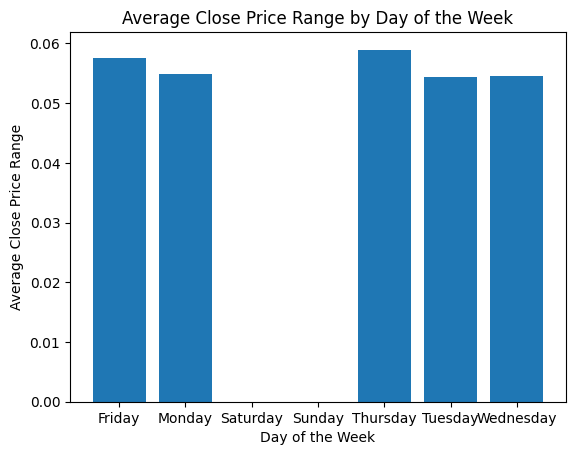

In [21]:
df_daily = df.resample('D').agg({'Close': 'mean'})

df_daily['Day_of_Week'] = df_daily.index.day_name()
avg_close_price_range = df_daily.groupby('Day_of_Week')['Close'].agg(lambda x: max(x) - min(x))

plt.bar(avg_close_price_range.index, avg_close_price_range)
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price Range')
plt.title('Average Close Price Range by Day of the Week')
plt.show()


In [24]:
df.index = pd.to_datetime(df.index)

df_daily = df.resample('D').first()

first_hour_greater = df_daily[df_daily['Close'] > df_daily['Open'].shift()]

print("First Hour of Each Day with Close Price Greater than Opening Hour:")
print(first_hour_greater['Close'])


First Hour of Each Day with Close Price Greater than Opening Hour:
Date
2019-01-04    1.13931
2019-01-08    1.14753
2019-01-10    1.15485
2019-01-15    1.14664
2019-01-22    1.13694
               ...   
2019-12-20    1.11239
2019-12-24    1.10899
2019-12-26    1.10908
2019-12-27    1.10966
2019-12-31    1.11995
Name: Close, Length: 108, dtype: float64


**Task 2**

<h4> Customer Transaction Data Analysis </h4>


Task 1: Import the data without downloading it

In [34]:
import pandas as pd

data_url = "https://drive.google.com/file/d/1SdMLlsJy8i1UVcc0W0m0pu8_MJ8cV7xp/view"
file_id = data_url.split("/")[-2]
csv_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(csv_url)


In [35]:
df.head()

,Transaction ID,ProductName,Quantity,Price Each,Transaction Date,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**Task 2: Sorting the data on the basis of Order Date**

In [36]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df = df.sort_values(by='Transaction Date')


**Cleaning the data**

In [37]:
df = df.drop_duplicates()
df = df.dropna()

In [47]:
df.head(10)

,Transaction ID,ProductName,Quantity,Price Each,Transaction Date,Address
73885,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
74695,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
76048,149343,Apple Airpods Headphones,1,150,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
76702,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
76055,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"
68050,141732,iPhone,1,700,2019-01-01 06:13:00,"446 Pine St, Atlanta, GA 30301"
76342,149620,Lightning Charging Cable,1,14.95,2019-01-01 06:34:00,"338 Chestnut St, San Francisco, CA 94016"
68820,142451,AAA Batteries (4-pack),1,2.99,2019-01-01 06:41:00,"232 12th St, Boston, MA 02215"
72603,146039,34in Ultrawide Monitor,1,379.99,2019-01-01 07:24:00,"53 River St, San Francisco, CA 94016"
69928,143498,AA Batteries (4-pack),3,3.84,2019-01-01 07:26:00,"428 Highland St, New York City, NY 10001"


**Finding the top 5 cities with the most sales of headphones**

In [52]:
headphones_df = df[df['ProductName '].str.contains('headphones', case=False)]
top_5_cities = headphones_df['Address'].value_counts().head(5)

**Creating a dataframe with monthly sales of items**

In [56]:
df['Month'] = df['Transaction Date'].dt.month
monthly_sales_df = df.pivot_table(index='Month', columns='ProductName ', aggfunc='size', fill_value=0)


**Identify the item sold maximum and the unique cities that bought it**

In [57]:
max_sold_item = df['ProductName '].value_counts().idxmax()
cities_max_item = df.loc[df['ProductName '] == max_sold_item, 'Address'].unique()


**Finding the month with the most orders of iPhone**

In [58]:
iphone_orders_df = df[df['ProductName '].str.contains('iphone', case=False)]
month_most_orders_iphone = iphone_orders_df['Transaction Date'].dt.month.value_counts().idxmax()


**Finding products that are most often sold together**

In [59]:
from itertools import combinations

product_combinations = []
for _, group in df.groupby('Transaction ID'):
    products = group['ProductName '].unique()
    product_combinations.extend(combinations(products, 2))

most_often_sold_together = pd.Series(product_combinations).value_counts().head()



**Finding the optimal time to display ads to customers for increased buying probability**

In [60]:
df['Hour'] = df['Transaction Date'].dt.hour
hourly_ads = df.groupby('Hour')['Transaction ID'].count()
optimal_time_to_display_ads = hourly_ads.idxmax()


In [61]:
print("Task 2 - Sorted Data:")
print(df.head())
print("\nTask 3 - Cleaned Data:")
print(df.head())
print("\nTask 4 - Top 5 Cities with Most Sales of Headphones:")
print(top_5_cities)
print("\nTask 5 - Monthly Sales of Items:")
print(monthly_sales_df)
print("\nTask 6 - Item Sold Maximum and Unique Cities that Bought It:")
print("Item:", max_sold_item)
print("Cities:", cities_max_item)
print("\nTask 7 - Month with Most Orders of iPhone:")
print(month_most_orders_iphone)
print("\nTask 8 - Products Most Often Sold Together:")
print(most_often_sold_together)
print("\nTask 9 - Optimal Time to Display Ads:")
print(optimal_time_to_display_ads)


Task 2 - Sorted Data:
      Transaction ID              ProductName  Quantity Price Each  \
73885         147268          Wired Headphones        1      11.99   
74695         148041      USB-C Charging Cable        1      11.95   
76048         149343  Apple Airpods Headphones        1        150   
76702         149964    AAA Batteries (4-pack)        1       2.99   
76055         149350      USB-C Charging Cable        2      11.95   

         Transaction Date                                 Address  Month  Hour  
73885 2019-01-01 03:07:00      9 Lake St, New York City, NY 10001      1     3  
74695 2019-01-01 03:40:00  760 Church St, San Francisco, CA 94016      1     3  
76048 2019-01-01 04:56:00     735 5th St, New York City, NY 10001      1     4  
76702 2019-01-01 05:53:00         75 Jackson St, Dallas, TX 75001      1     5  
76055 2019-01-01 06:03:00           943 2nd St, Atlanta, GA 30301      1     6  

Task 3 - Cleaned Data:
      Transaction ID              ProductName  